# Telecom Churn Case Study

In this notebook, we are going to work on a Telecom company case study where using the past information we need to build a model that can predict whether a particular customer will  switch to different service provider or not (Churn or not). So for us the variable of interest is `Churn` which will tell us whether or not a particular customer has churned. It is a binary variable, 1 means that the customer has churned and 0 means the customer has not churned.

Company also needs to know the factors (variables) which influences the Churn variable and how much they impact individually. This will help the company to improve those area to retain their customers. Company needs a descent model that can predict good percentage of Churn and Non-Churn customer correctly.

We will build a Logistic Regression model for this problem because it is easy to interpret and this will help company in decision making better.

We will perform following steps in this notebook:

- **Step 1**: Importing Libraries
- **Step 2**: Merging all Data Frames
- **Step 3**: Exploring Final Data Frame
- **Step 4**: Data Preparation
- **Step 5**: Splitting the Dataset
- **Step 6**: Feature Scaling
- **Step 7**: Model Building
- **Step 8**: Model Evaluation
- **Step 9**: Model Validation
- **Step 10**: Model Interpretation

# Step 1: Importing Libraries

In [1]:
#Importing all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#building model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#model evaluation
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#model validation
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data display coustomization
pd.set_option('display.max_columns', 100)

# Step 2: Merging all Data Frames

Now we will load data in the notebook using pandas library.

The data is provided in three seprate files:
1. Churn data like monthly recharge, customer churned or not etc.
2. Customer's Demographics like gender, number of dependents etc.
3. Services Availed by the customer like online services etc.

We need to concatenate all these three files into a single file.

In [2]:
# Importing Churn data and printing first 5 rows
churn_data = pd.read_csv("E:/2. Study Material/24. UpGrad - Machine Learning/2. Logistic Regression/2. Multivariate Logistic Regression - Model Building/churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Importing Customer Demographic data and printing first 5 rows
customer_data = pd.read_csv("E:/2. Study Material/24. UpGrad - Machine Learning/2. Logistic Regression/2. Multivariate Logistic Regression - Model Building/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
# Importing Services availed data and printing first 5 rows
internet_data = pd.read_csv("E:/2. Study Material/24. UpGrad - Machine Learning/2. Logistic Regression/2. Multivariate Logistic Regression - Model Building/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Now we can see that all three data frames have `customerID` column in common. We will perform inner join to combine all three data frames into one.

In [5]:
# Merging Churn data and Customer Demographic data on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [6]:
# # Merging df_1 and Service availed data on 'customerID'
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

Data merging is successully done.

# Step 3: Exploring Final Data Frame

In [7]:
# Now we have one data frame consisting all data. Now we will see first five rows of the new data frame
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
#prinitng shape of the dataset
r,c = telecom.shape
print(f"Shape of telecom dataset: {telecom.shape}")
print(f"Number of rows: {r}")
print(f"Number of columns: {c}")

Shape of telecom dataset: (7043, 21)
Number of rows: 7043
Number of columns: 21


This means we have **21 features** about a customer including target variable `Churn` and we have details for **7043 customers**.

Brief description about each feature (column) is given below:
1. `customerID`: The unique ID of each customer
2. `tenure`: Number of monthscustomer has been using the service
3. `PhoneService`: Whether a customer has a Phone services or not (Yes, No)
4. `Contract`: The contract term of the customer (Month-to-month, One year, Two year)
5. `PaperlessBilling`: Whether a customer has opted for paperless billing (Yes, No)
6. `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
7. `MonthlyCharges`: Specifies the money paid by a customer each month
8. `TotalCharges`: The total money paid by the customer to the company
9. `Churn`: This is the target variable which specifies if a customer has churned or not (Yes, No)
10. `gender`: The gender of a person (Male, Female)
11. `SeniorCitizen`: Whether a customer can be classified as a senior citizen (1=Yes, 0=No)
12. `Partner`: Whether the customer has a partner or not (Yes, No)
13. `Dependents`: Whether the customer has dependents(children/ retired parents) or not (Yes, No)
14. `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)
15. `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No)
16. `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)
17. `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)
18. `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
19. `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)
20. `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
21. `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)

In [9]:
# let's look at the some statistics of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
# Let's look at the data type of each feature
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


#### Variables are of different types, which are categorized below

- **Categorical**:
    - **Binary (7)**: `SeniorCitizen`, `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, and `Churn`
    
    - **Multimonial (11)**: `CustomerID`, `MultipleLines`,`InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaymentMethod`
    
    
- **Continuous(3)**: `TotalCharges `, `MonthlyCharges` and `Tenure` 

# Step 4: Data Preparation

#### Converting Binary Variables (Yes/ No) into (1/ 0)

In [11]:
# Defining method to convert them
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

bin_var =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Applying the method to the data frame
telecom[bin_var] = telecom[bin_var].apply(binary_map)

#### Converting Binary Variable gender (Male/ Female) into (1/ 0)

In [12]:
#creating dummies for gender and dropping first column because single column can capture the whole data
gender = pd.get_dummies(telecom['gender'], drop_first=True)

# Merging the above results with telecom data frame 
telecom = pd.concat([telecom, gender], axis=1)

In [13]:
#printing first 5 rows of the data frame after converting Binary variables
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Male
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0


`Male` column represents the gender column now, 1 = Male and 0 = Female

### Coverting Multinomial Variables by creating dummy variables

A dummy variable is a numeric variable that represents categorical data.

Technically, dummy variables are dichotomous, quantitative variables. Their range of values is small; they can take on only two quantitative values. As a practical matter, regression results are easiest to interpret when dummy variables are limited to two specific values, 1 or 0. Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.


##### Avoid the Dummy Variable Trap
When defining dummy variables, a common mistake is to define too many variables. If a categorical variable can take on k values, it is tempting to define k dummy variables. Resist this urge. Remember, you only need k - 1 dummy variables.

A kth dummy variable is redundant; it carries no new information. And it creates a severe multicollinearity problem for the analysis.

In [14]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'InternetService']], drop_first=True)

# Adding the results to the telecom dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,0,1,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,1,0,0,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,0,1,0,1,0


In [16]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
# Adding the results to the telecom dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the telecom dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the telecom dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the telecom dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the telecom dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the telecom dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
ssm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
ssm1 = ssm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the telecom dataframe
telecom = pd.concat([telecom,ssm1], axis=1)

We dropped `No phone service` and `No internet service` because they are already included from columns `InternetService` and `PhoneService` as we can see below

In [17]:
telecom.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [18]:
telecom.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated Variables

In [20]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [21]:
#The varaible TotalCharges is of String data type so converting it into float type
telecom['TotalCharges'] = pd.to_numeric(telecom["TotalCharges"].replace(" ",""),downcast="float")

In [22]:
#checking data types of variables 
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float32
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Male                                   7043 non-null   uint8  
 11  Cont

We have transformed all the variables, now next step is to check for outlier in the dataset.

### Checking for Outliers

Text(0.5, 1.0, 'TotalCharges')

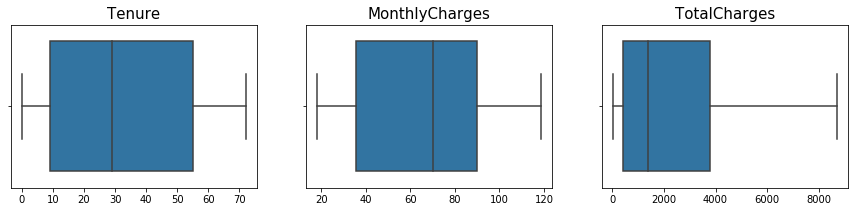

In [23]:
#Plot Box Plot for all there continuous variables 

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(telecom[["tenure"]])
plt.title("Tenure",size=15)

plt.subplot(1,3,2)
sns.boxplot(telecom[["MonthlyCharges"]])
plt.title("MonthlyCharges",size=15)

plt.subplot(1,3,3)
sns.boxplot(telecom[["TotalCharges"]])
plt.title("TotalCharges",size=15)

From the above Box Plots we can see that there are no outliers.

### Checking for Missing Values

In [24]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Male                                      0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [25]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [26]:
# Checking again for missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Male                                     0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

Now we don't have any missing values

### Checking the Correlation among Variables.
We are using Pearson's correlation to compute correlation matrix

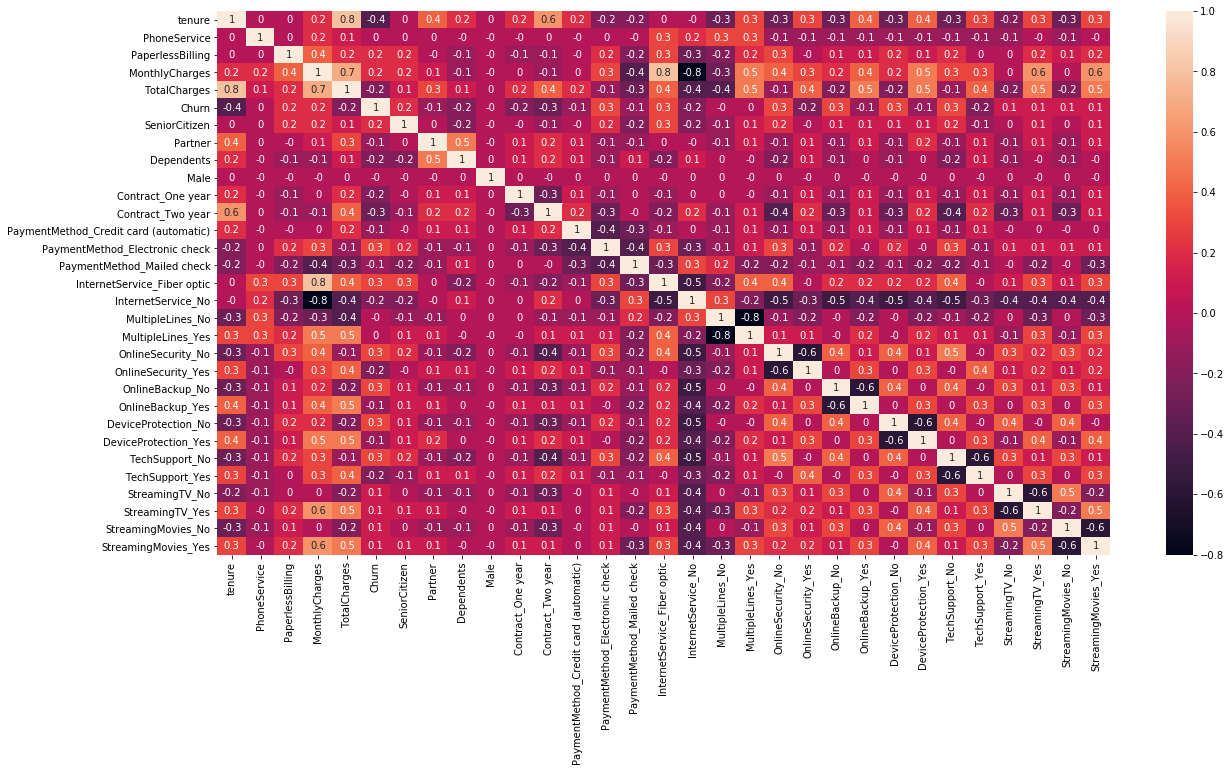

In [27]:
# Correlation Matrix
plt.figure(figsize = (20,10))
sns.heatmap(round(telecom.corr(),1),annot = True)
plt.show()

In [28]:
#dropping the highly correlated variables

telecom.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1,inplace=True)

# Step 5: Splitting the Dataset

We are done with data processing steps,  now the data is ready to fetch in the model.

We will first split the dataset into towo part:
- X = All independent variables
- y = Dependent variable `Churn`

Then we will split the dataset into Training set and Testing set:
- Training Set: Model is build using this dataset
- Testing Set: Model Validation is done using this set

We will be doing In-sample validation for this problem. Training set and Testing set will be in ratio 7:3 respectively. 

In [29]:
#customerID column is of no use for the model so we drop that column also
X = telecom.drop(['Churn','customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,1,0,1,29.85,29.850000,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,34,1,0,56.95,1889.500000,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0
2,2,1,1,53.85,108.150002,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,45,0,0,42.30,1840.750000,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0
4,2,1,1,70.70,151.649994,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [30]:
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

Now we split the dataset into Training set and Testing set with ratio 7:3

In [31]:
# Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. To supress this effect, we need to bring all features to the same level of magnitudes.

There are several ways for performing Feature Scaling, here we will be using `Standard Scalar` or `Standardization`
\begin{equation*}
\mathbf{X_*}   = \frac{X - Mean}{Standard Deviation}
\end{equation*}

In [32]:
#we will standardize continous variables only and not categorical variables
sc = StandardScaler()
sc.fit(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1


### Minimum samples required for building a Logistic Regression Model

For multivariable logistic regression, Peduzzi, Concato, Kemper, Holford, & Feinstein (1996) suggested a very simple guideline for a minimum number of cases for logistic regression study.

**p:** Smallest of the proportions of negative or positive cases in the population

**k:** Number of Independent variables
\begin{equation*}
\mathbf{N}   = \frac{10*k}{p}
\end{equation*}

In [33]:
### Checking the 
p = (sum(y_train)/len(y_train))
print(f"p: {p}")

k = X_train.shape[1]
print(f"k: {k}")

N = 10 * k / p
print(f"N: {int(N)}")

p: 0.26147907354733846
k: 23
N: 879


This means we need to have minimum **879** samples to build a Logistic Regression model and in the `X_train` we have **4922** samples i.e. we can build a Logistic model.

# Step 7: Model Building

Now we will build Logistic Regression model using `statsmodel` and `sklearn` libraries.

We will perform Coarse tuning and Fine tuning technique to do `Feature Selection` and select best features for the model

- **Coarse Tuning**: Recursive Feature Elimination (RFE) 
- **Fine Tuning**: Variable Inflation Factors (VIF) and p-value

## Building First Model

Building first model with all selected varaiables

In [34]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 02 Jul 2020   Deviance:                       4009.4
Time:                        21:46:48   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Male                                     -0.0346      0.078     -0.442      0.658      -0.188       0.119
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

### Feature Selection Using RFE

Selecting top 15 features for the model out of 23 features using RFE

In [35]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [36]:
#top 15 columns returned by RFE
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

## Building Second Model

Building second model after selecting top 15 features from RFE

In [37]:
#building the model with top 15 features which we got from RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Thu, 02 Jul 2020   Deviance:                       4022.2
Time:                        21:46:50   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

We can notice that p-value of all features is < 0.05

In [38]:
# Getting the predicted values on the train set and showing first 10 predictions in terms of probabilities
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [39]:
#reshaping the predicted array
y_train_pred = y_train_pred.values.reshape(-1)

##### Comparing Actual Churn and Predicted Churn on Training set 

In [40]:
#creating data frame with actual churn and predicted probablilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


##### Creating new column 'Predicted' with 1 if Churn_Prob > 0.5 else 0

In [41]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


### Checking Accuracy of the Model

In [42]:
#Checking Accuracy of the model
print("Accuracy (Training Set): ",round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4))

Accuracy (Training Set):  0.8102


Accuracy of the model looks good with **81%**. Let's check Variable Inflation Factors (VIF) to check multicollinearity because Pearson's correlation calculates one-to-one correlation only. However, VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. 

### Checking VIFs

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [44]:
#We will drop variables one by one, droping MonthlyCharges column
col = col.drop('MonthlyCharges',1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

## Building Third Model

Building third model after dropping `MonthlyCharges`variable.

In [45]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Thu, 02 Jul 2020   Deviance:                       4046.2
Time:                        21:46:51   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

We can notice that p-value of `MultipleLines_Yes` is 0.07 (> 0.05).

This means that variable is insignificant for us and hence we can drop it.

##### Making predictions on the Training Set

In [46]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred[:10]

array([0.22790197, 0.22864389, 0.67489226, 0.61586836, 0.66226032,
       0.41819927, 0.28813321, 0.7951366 , 0.17433168, 0.51908789])

##### Creating new column 'Predicted' with 1 if Churn_Prob > 0.5 else 0

In [47]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


### Checking Accuracy of the Model

In [48]:
# Let's check the overall accuracy.
print("Accuracy (Training Set): ",round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4))

Accuracy (Training Set):  0.8058


So overall the accuracy hasn't dropped much.

### Checking VIFs

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


We have seen `MultipleLines_Yes` variable is insignificant due to p-value and `TotalCharges` has high VIF value. However, we will drop only one variable at a time and there we give priority to p-value more than VIF.

Therefore, we will drop `MultipleLines_Yes`

In [50]:
#We are droping MultipleLines_Yes variable as it is insignificant
#We give priority to p-value than VIF
col = col.drop('MultipleLines_Yes',1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

## Building Fourth Model

Building Fourth model after dropping `MultipleLines_Yes` variable

In [51]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.8
Date:                Thu, 02 Jul 2020   Deviance:                       4049.5
Time:                        21:46:52   Pearson chi2:                 5.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5390      0.126    -12.238      0.000      -1.785      -1.293
tenure                                   -1.3489      0.179     -7.527      0.000      -1.700      -0.998
PaperlessBilling                          0.3602      0.089      4.037      0.000       0.185       0.535
TotalCharges                              0.4932      0.183      2.697      0.007       0.135       0.852
SeniorCitizen                             0.4655      0.099      4.701      0.000       0.271       0.660
Contract_One year                        -0.7459      0.127     -5.877      0.000      -0.995      -0.497
Contract_Two year                        -1.3430      0.210     -6.392      0.000      -1.755      -0.931
PaymentMethod_Credit card (automatic)    -0.3864      0.112     -3.440      0.001      -0.607      -0.166
PaymentMethod_Mailed check               -0.3703      0.110     -3.353      0.001      -0.587      -0.154
InternetService_Fiber optic               0.7172      0.108      6.615      0.000       0.505       0.930
InternetService_No                       -0.9545      0.156     -6.110      0.000      -1.261      -0.648
TechSupport_Yes                          -0.4426      0.101     -4.365      0.000      -0.641      -0.244
StreamingTV_Yes                           0.2868      0.096      2.983      0.003       0.098       0.475
StreamingMovies_Yes                       0.1935      0.096      2.023      0.043       0.006       0.381
=========================================================================================================
"""

We can notice that p-value for all variables are < 0.05

##### Making predictions on the Training Set

In [52]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred[:10]

array([0.20722391, 0.23757202, 0.6884431 , 0.6327585 , 0.67560872,
       0.42692131, 0.29226155, 0.77852895, 0.17827156, 0.49840048])

##### Creating new column 'Predicted' with 1 if Churn_Prob > 0.5 else 0

In [53]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.207224,879,0
1,0,0.237572,5790,0
2,1,0.688443,6498,1
3,1,0.632759,880,1
4,1,0.675609,2784,1


### Checking Accuracy of the Model

In [54]:
# Let's check the overall accuracy.
print("Accuracy (Training Set): ",round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4))

Accuracy (Training Set):  0.8035


The accuracy is still practically the same.

### Checking VIFs

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.35
0,tenure,6.90
5,Contract_Two year,3.05
8,InternetService_Fiber optic,2.70
12,StreamingMovies_Yes,2.61
11,StreamingTV_Yes,2.59
1,PaperlessBilling,2.49
9,InternetService_No,2.40
10,TechSupport_Yes,1.95
4,Contract_One year,1.79


In [56]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

## Building Fifth Model

Building fifth model after dropping `TotalCharges` variable

In [57]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.5
Date:                Thu, 02 Jul 2020   Deviance:                       4057.1
Time:                        21:46:53   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5953      0.123    -12.944      0.000      -1.837      -1.354
tenure                                   -0.9025      0.062    -14.475      0.000      -1.025      -0.780
PaperlessBilling                          0.3528      0.089      3.959      0.000       0.178       0.527
SeniorCitizen                             0.4711      0.099      4.741      0.000       0.276       0.666
Contract_One year                        -0.7415      0.126     -5.874      0.000      -0.989      -0.494
Contract_Two year                        -1.3118      0.208     -6.303      0.000      -1.720      -0.904
PaymentMethod_Credit card (automatic)    -0.3867      0.112     -3.439      0.001      -0.607      -0.166
PaymentMethod_Mailed check               -0.3362      0.110     -3.070      0.002      -0.551      -0.122
InternetService_Fiber optic               0.8626      0.094      9.169      0.000       0.678       1.047
InternetService_No                       -0.9718      0.155     -6.257      0.000      -1.276      -0.667
TechSupport_Yes                          -0.4058      0.101     -4.032      0.000      -0.603      -0.208
StreamingTV_Yes                           0.3458      0.094      3.695      0.000       0.162       0.529
StreamingMovies_Yes                       0.2496      0.093      2.675      0.007       0.067       0.432
=========================================================================================================
"""

We can notice that p-value for all variables are < 0.05

##### Making predictions on the Training Set

In [58]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred[:10]

array([0.22091782, 0.28438286, 0.68590164, 0.65455026, 0.70268409,
       0.40702394, 0.27875266, 0.77765989, 0.20869313, 0.50443085])

##### Creating new column 'Predicted' with 1 if Churn_Prob > 0.5 else 0

In [59]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.220918,879,0
1,0,0.284383,5790,0
2,1,0.685902,6498,1
3,1,0.654550,880,1
4,1,0.702684,2784,1


### Checking Accuracy of the Model

In [60]:
# Let's check the overall accuracy.
print("Accuracy (Training Set): ",round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4))

Accuracy (Training Set):  0.8031


The accuracy is still practically the same.

### Checking VIFs

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.97
11,StreamingMovies_Yes,2.53
10,StreamingTV_Yes,2.50
1,PaperlessBilling,2.41
7,InternetService_Fiber optic,2.33
8,InternetService_No,2.01
0,tenure,1.97
9,TechSupport_Yes,1.92
3,Contract_One year,1.78
6,PaymentMethod_Mailed check,1.63


#### All variables have a good value of VIF and none of the variable is insignificant. Therefore we don't need to drop any more variables and we can proceed with this model.

# Step 8: Model Evaluation

## Confusion Metrix

In [62]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3270,  365],
       [ 604,  683]], dtype=int64)

In [63]:
print("Predicted     |  Not Churn (0)  |  Churn (1)")
print("Actual        |                 | ")
print("--------------|-----------------|----------------")
print("Not Churn (0) |     3270        |     365")
print("--------------|-----------------|----------------")
print("Churn     (1) |      604        |     683")

Predicted     |  Not Churn (0)  |  Churn (1)
Actual        |                 | 
--------------|-----------------|----------------
Not Churn (0) |     3270        |     365
--------------|-----------------|----------------
Churn     (1) |      604        |     683


In [64]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

## Metrics for Evaluation

In [65]:
#Accuracy of the final model
accuracy = (TN + TP)/float(TN+FN+TP+FP)
print("Accuracy of the model: ",round(accuracy,3))

# Sensitivity of the final model
sensitivity = TP / float(TP+FN)
print("Sensitivity of the model: ",round(sensitivity,3))

# Specificity of the final model
specificity = TN / float(TN+FP)
print("Specificity of the model: ",round(specificity,3))

Accuracy of the model:  0.803
Sensitivity of the model:  0.531
Specificity of the model:  0.9


We can notice that we have got very good Accuracy and Specificity score, however, Sensitivity score is not that good.

It means that our model is not able to capture `churned` customer very well and this can be a problematic for the business. We wish to capture them properly, but How?

**Remember**: We declared the customer as churn (1) or not churn (0) from probabilities based on some arbitrary thresh-hold. We chose that thresh-hold to be 0.5 i.e. any customer with prob > 0.5 marked as churn (1) else not churn (0).

Therefore, now we need to find optimal value of the thresh-hold so that our model can capture churn customer well.

## Finding the Optimal Thresh-hold value

Optimal thresh-hold probability is that probability where we get balanced sensitivity and specificity

In [66]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.220918,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.284383,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.685902,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.654550,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.702684,2784,1,1,1,1,1,1,1,1,1,0,0


In [67]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.261479     1.000000     0.000000
0.1          0.1  0.617838     0.944833     0.502063
0.2          0.2  0.723283     0.850039     0.678404
0.3          0.3  0.769200     0.776224     0.766713
0.4          0.4  0.790532     0.635587     0.845392
0.5          0.5  0.803129     0.530692     0.899587
0.6          0.6  0.800284     0.388500     0.946080
0.7          0.7  0.776920     0.193473     0.983494
0.8          0.8  0.745835     0.034188     0.997799
0.9          0.9  0.738521     0.000000     1.000000


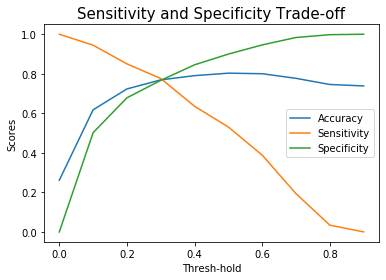

In [68]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.xlabel("Thresh-hold")
plt.ylabel("Scores")
plt.title("Sensitivity and Specificity Trade-off",size=15)
plt.show()

#### From the above curve ,we can notice that 0.3 is the optimum thresh-hold value

In [69]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.220918,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.284383,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.685902,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.654550,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.702684,2784,1,1,1,1,1,1,1,1,1,0,0,1


### Let's look at the Confustion Matrix, Accuracy, Sensitivity and Specificity for the final optimal thresh-hold value

In [70]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2787,  848],
       [ 288,  999]], dtype=int64)

In [71]:
print("Predicted     |  Not Churn (0)  |  Churn (1)")
print("Actual        |                 | ")
print("--------------|-----------------|----------------")
print("Not Churn (0) |     2787        |     848")
print("--------------|-----------------|----------------")
print("Churn     (1) |      288        |     999")

Predicted     |  Not Churn (0)  |  Churn (1)
Actual        |                 | 
--------------|-----------------|----------------
Not Churn (0) |     2787        |     848
--------------|-----------------|----------------
Churn     (1) |      288        |     999


In [72]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [73]:
#Accuracy of the final model
accuracy = (TN + TP)/float(TN+FN+TP+FP)
print("Accuracy of the model: ",round(accuracy,3))

# Sensitivity of the final model
sensitivity = TP / float(TP+FN)
print("Sensitivity of the model: ",round(sensitivity,3))

# Specificity of the final model
specificity = TN / float(TN+FP)
print("Specificity of the model: ",round(specificity,3))

Accuracy of the model:  0.769
Sensitivity of the model:  0.776
Specificity of the model:  0.767


Now we can notice that, we have got `Sesitivity` score along with good `Accuracy` and `Specificity`.

Our model performance is similar on all three metrics, now let's look at the **Receiver Operating Characteristic (ROC) curve** of the model.

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## ROC Curve

In [74]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    #plt.savefig("E:/1. NITW/Project 4th Sem/ROC Curve.jpg")
    plt.show()
    
    return None

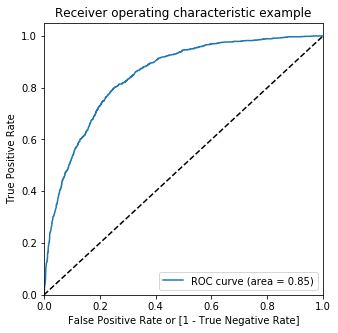

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

We can notice that ROC curve look very good and **Area under the curve (AUC)** is `0.85` which is a very good score and tells the goodness of the model.

Therefore, all this shows that our the model we build using Training dataset fits goon on that and the optimal value of the thresh-hold gives us good scores.

Now let's look at some different metrics for evaluation which we come accross in the theoritical part. However for this dataset we will refer `Sensitivity` and `Specificity` only.

## Precision and Recall

##### Precision 

It tells us the percentage of 1’s predicted correctly out of total 1’s predicted.

Precision = TP / (TP + FP)

##### Recall

It tell us the 1’s predicted correctly out of total actual 1’s. It's basically sensitivity.

Recall = TP / (TP + FN)

In [76]:
# Precision of the final model
precision = TP / float(TP+FP)
print("Precision of the model: ",round(precision,3))

# Recall of the final model
recall = TP / float(TP+FN)
print("Recall of the model: ",round(recall,3))

Precision of the model:  0.541
Recall of the model:  0.776


### Precision and Recall Tradeoff

Let's look at the Precision and Recall trade-off now

In [77]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

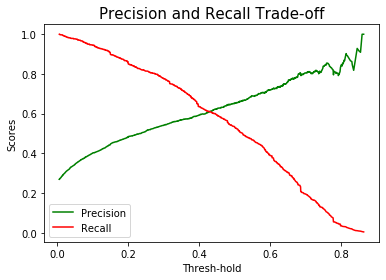

In [78]:
plt.plot(thresholds, p[:-1], "g-",label="Precision")
plt.plot(thresholds, r[:-1], "r-",label="Recall")
plt.xlabel("Thresh-hold")
plt.ylabel("Scores")
plt.title("Precision and Recall Trade-off",size=15)
plt.legend()
plt.show()

#### Observations

We can see that thresh-hold value of `0.5` would be preffered to choose if we use `Precision` and `Recall` for model evaluation.

We can in the graph that the curve for precision is quite jumpy towards the end. This is because the denominator of precision, i.e. (TP+FP) is not constant as these are the predicted values of 1s. And because the predicted values can swing wildly, we get a very jumpy curve.

# Step 9: Model Validation

We are done with the model building and evaluation steps, now let's check for the stability of the model.

Whether the model gives similar scores on the `Testing Set` also. We are using `In-sample` validation for this problem. 

##### Let's first scale down the continous varibales using Standardization.

We have already trained the scalar on the `Training Set`, now we just need to transform the `Testing Set` using the same scalar.

In [79]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

##### Now selecting only those columns which we used to build the final model

In [80]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,1
3730,0.999203,1,0,0,0,1,0,1,0,0,1,1
1761,1.040015,1,0,0,1,1,0,0,1,0,0,0
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0


### Making Predictions using the trained model

In [81]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [82]:
y_test_pred[:10]

942     0.449353
3730    0.254817
1761    0.007756
2283    0.609418
1872    0.014900
1970    0.712136
2532    0.315777
1616    0.009788
2485    0.574973
5914    0.151332
dtype: float64

In [83]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [84]:
# Let's see the head
y_pred_1.head()

,0
942,0.449353
3730,0.254817
1761,0.007756
2283,0.609418
1872,0.014900


In [85]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [86]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [87]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [88]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

#### Final Probabilities corrosponding to the customerID

In [89]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.449353
1,1,3730,0.254817
2,0,1761,0.007756
3,1,2283,0.609418
4,0,1872,0.014900


In [90]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [91]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.449353
1,1,3730,0.254817
2,0,1761,0.007756
3,1,2283,0.609418
4,0,1872,0.014900


##### Creating new column 'final_predicted' with 1 if Churn_Prob > 0.3 else 0

Choosing the optimal thresh-hold value

In [92]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [93]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.449353,1
1,1,3730,0.254817,0
2,0,1761,0.007756,0
3,1,2283,0.609418,1
4,0,1872,0.014900,0


### Let's look at the Confustion Matrix, Accuracy, Sensitivity and Specificity for the final optimal thresh-hold value

In [94]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1144,  384],
       [ 163,  419]], dtype=int64)

In [95]:
print("Predicted     |  Not Churn (0)  |  Churn (1)")
print("Actual        |                 | ")
print("--------------|-----------------|----------------")
print("Not Churn (0) |     1144        |     384")
print("--------------|-----------------|----------------")
print("Churn     (1) |      163        |     419")

Predicted     |  Not Churn (0)  |  Churn (1)
Actual        |                 | 
--------------|-----------------|----------------
Not Churn (0) |     1144        |     384
--------------|-----------------|----------------
Churn     (1) |      163        |     419


In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Model Evaluation (Testing Set)

In [97]:
#Accuracy of the final model
accuracy = (TN + TP)/float(TN+FN+TP+FP)
print("Accuracy of the model: ",round(accuracy,3))

# Sensitivity of the final model
sensitivity = TP / float(TP+FN)
print("Sensitivity of the model: ",round(sensitivity,3))

# Specificity of the final model
specificity = TN / float(TN+FP)
print("Specificity of the model: ",round(specificity,3))

Accuracy of the model:  0.741
Sensitivity of the model:  0.72
Specificity of the model:  0.749


### Observations

We can notice that, for the Testing Set, all three metrics shows similar score as observed in the Training Set.

**Training Set**
- Accuracy of the model:  0.769
- Sensitivity of the model:  0.776
- Specificity of the model:  0.767

**Testing Set**
- Accuracy of the model:  0.741
- Sensitivity of the model:  0.72
- Specificity of the model:  0.749

We can notice that scores are similar for both Training and Testing Set, this shows that the model we build using Training Set also fits good and generalizes on the Testing Set.

Hence, we are ready to deploy the model and make predicitions and decisions using that.

However, from time to time we need to monitor its performance and if the accuracy drops on the new data then we need to rebuild the model using new data.

# Step 10: Model Interpretation

Now we reached to the final step in this notebook which is interpretation of model coefficients and making the final conclusion.

In [98]:
model  = pd.DataFrame({"Features": X_train_sm.columns,"Coefficient":res.params.values})
model["Odds_Ratio"] = model["Coefficient"].apply(lambda x: np.exp(x))
model[["Coefficient","Odds_Ratio"]] = model[["Coefficient","Odds_Ratio"]].apply(lambda x: round(x,2))
model["Perc_Impact"] = model["Odds_Ratio"].apply(lambda x: (x-1)*100)
model

,Features,Coefficient,Odds_Ratio,Perc_Impact
0,const,-1.60,0.20,-80.0
1,tenure,-0.90,0.41,-59.0
2,PaperlessBilling,0.35,1.42,42.0
3,SeniorCitizen,0.47,1.60,60.0
4,Contract_One year,-0.74,0.48,-52.0
5,Contract_Two year,-1.31,0.27,-73.0
6,PaymentMethod_Credit card (automatic),-0.39,0.68,-32.0
7,PaymentMethod_Mailed check,-0.34,0.71,-29.0
8,InternetService_Fiber optic,0.86,2.37,137.0
9,InternetService_No,-0.97,0.38,-62.0


### Observations

**Tenure:**

- Coefficient: -.90
- Odds Ratio: 0.41

*Tenure is continous variable which was standarized using Standard Scalar. Therefore, for 1 stardardized unit increase the odds of getting churned reduces by 59%. We know that 1 stardardized unit of tenure is equal to 24.5 months, therefore for increase in tenure by 24.5 months will lead to decrease in customer getting churned by 59%.*

**PaperlessBilling**

- Coefficient: 0.35
- Odds Ratio: 1.42

*The odds of a customer to get churned in case he/ she has opted for Paperless Billing are 1.42 higher than in case of Not opted for Paperless Billing, considering every other variable same.*
*In terms of percentage change, the odds of customer with Paperless Billing getting churned is 42% higher than the odds of customer with not Paperless Billing getting churned.*

**SeniorCitizen**

- Coefficient: 0.47
- Odds Ratio: 1.60

*The odds of a Senior Citizen customer to get churned are 1.60 higher than in case of non-Senior Citizen, considering every other variable same.*
*In terms of percentage change, the odds of a Senior Citizen customer getting churned is 60% higher than the odds of not Senior Citizen customer getting churned.*

**Contract_One year**

- Coefficient: -0.74
- Odds Ratio: 0.48

*The odds of a customer with One Year contract to get churned are 0.52 lower than in case of customer not having One Year contract, considering every other variable same.*
*In terms of percentage change, the odds of a customer with One Year contract getting churned is 52% lesser than the odds of a customer not having One Year contract getting churned.*

**Contract_Two year**

- Coefficient: -1.31
- Odds Ratio: 0.27

*The odds of a customer with Two Year contract to get churned are 0.73 lower than in case of customer not having Two Year contract, considering every other variable same.*
*In terms of percentage change, the odds of a customer with Two Year contract getting churned is 73% lesser than the odds of a customer not having Two Year contract getting churned.*

**PaymentMethod_Credit card (automatic)**

- Coefficient: -0.39
- Odds Ratio: 0.68

*The odds of a customer with Automatic Payment via Credit Card to get churned are 0.32 lower than in case of customer not having Automatic Payment via Credit Card, considering every other variable same.*
*In terms of percentage change, the odds of a customer with Automatic Payment via Credit Card getting churned is 32% lesser than the odds of a customer not having Automatic Payment via Credit Card getting churned.*

**PaymentMethod_Credit card (automatic)**

- Coefficient: -0.39
- Odds Ratio: 0.68

*The odds of a customer with Automatic Payment via Credit Card to get churned are 0.32 lower than in case of customer not having Automatic Payment via Credit Card, considering every other variable same.*
*In terms of percentage change, the odds of a customer with Automatic Payment via Credit Card getting churned is 32% lesser than the odds of a customer not having Automatic Payment via Credit Card getting churned.*

**PaymentMethod_Mailed check**


- Coefficient: -0.34
- Odds Ratio: 0.71

*The odds of a customer with have enabled Payment Method via Mail Check to get churned are 0.29 lower than in case of customer not enabled Payment Method via Mail Check, considering every other variable same.*
*In terms of percentage change, the odds of a customer enabled Payment Method via Mail Check getting churned is 29% lesser than the odds of a customer not enabled Payment Method via Mail Check getting churned.*

**InternetService_Fiber Optic**

- Coefficient: 0.86
- Odds Ratio: 2.37

*The odds of a customer with having Fiber Optic service to get churned are 2.37 higher than in case of customer not having Fiber Optic service, considering every other variable same.*
*In terms of percentage change, the odds of a customer having Fiber Optic service getting churned is 137% higher than the odds of a customer not having Fiber Optic service getting churned.*

**InternetService_No**

- Coefficient: -0.97
- Odds Ratio: 0.38

*The odds of a customer with Not having Interner Services to get churned are 0.62 lower than in case of customer having Interner Services, considering every other variable same.*
*In terms of percentage change, the odds of a customer Not having Interner Services getting churned is 62% lesser than the odds of a customer having Interner Services getting churned.*

**TechSupport_Yes**

- Coefficient: -0.41
- Odds Ratio: 0.67

*The odds of a customer with having Tech Support to get churned are 0.33 lower than in case of customer not having Tech Support , considering every other variable same.*
*In terms of percentage change, the odds of a customer having Tech Support  getting churned is 33% lesser than the odds of a customer not having Tech Support getting churned.*

**StreamingTV_Yes**

- Coefficient: 0.35
- Odds Ratio: 1.41

*The odds of a customer with Streaming TV services to get churned are 1.41 higher than in case of customer not having Streaming TV services, considering every other variable same.*
*In terms of percentage change, the odds of a customer Streaming TV services getting churned is 41% higher than the odds of a customer not having Streaming TV services getting churned.*

**StreamingMovies_Yes**

- Coefficient: 0.25
- Odds Ratio: 1.28

*The odds of a customer with Streaming Movies services to get churned are 1.28 higher than in case of customer not having Streaming Movies services, considering every other variable same.*
*In terms of percentage change, the odds of a customer Streaming Movies services getting churned is 28% higher than the odds of a customer not having Streaming Movies services getting churned.*

## Conclusion

We have completed all steps for solving a classification problem. We have seen that the model we built gives good accuracy score of 77% on the Training dataset and 74% on the Testing dataset along with other metrics. For this problem we preffered to use Sensitivity and Specificity metrics for the evauation. We have also seen impact of each variable on the probability of churn. Below are few observations about the model:

- A customer with long term contracts like One year and Two Year are less likely to churn than the customer having Monthly contract.

- A customer who is associated with the company from longer time is less likely to churn than a customer who is associated from few months. Reason can be the customer is happy with the services and wishes to continue with them.

- Customer using Internet Services, Fiber Optics, Streaming TV and Movies servies are more likely to churn than customer who are not using these services. Reason can be company not providing good Internet services and need to work on that.

- Customer who have opted for Payment Method through Credit Card or Mailed check are less likely to churn then other customers.

Overall, company need to provide better internet services and other services associated with internet to retain their customers.